#### torchvision 제공 이미지 전처리 관련 기능
- torchvision.transforms 서브 모듈
    * 이미지 크기 조절
    * 이미지 정규화
    * 이미지 자르기
    * 이미지 회전 등등 다양한 기능 제공
    * 이미지 데이터 타입 ==> Pillow Image

- 모듈로딩 및 데이터 설정 <hr>

In [2]:
# %pip install pillow

In [3]:
import cv2                                  # => 이미지 데이터 ndarray
from PIL import Image                       # %pip install pillow  => 이미지 데이터 JpegImage
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms          # pytorch 지원 이미지 변환 관련 모듈
import torch

In [4]:
## 데이터 관련 설정
IMG_PATH = '../data/'
IMG_FILE = IMG_PATH+'pretty.jpg'

* openCV & pillow <hr>

In [5]:
# cv_img = cv2.imread(IMG_FILE)
# cv_img = cv2.cvtColor(cv_img,cv2.COLOR_BGR2RGB) # BGR ==> RGB

# pil_img = Image.open(IMG_FILE)

cv_img = cv2.imread(IMG_FILE)
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)    # BGR => RGB

pil_img = Image.open(IMG_FILE)

In [6]:
print(f'type(cv_img) : {type(cv_img)}')
print(f'type(pil_img) : {type(pil_img)}')

type(cv_img) : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.JpegImagePlugin.JpegImageFile'>


* ndarray ==> Tensor <hr>

In [7]:
# 일반적인 텐서 만들때
cvTensor1 = torch.tensor(cv_img)
print(f'cvTensor1 : {cvTensor1.shape}, {cvTensor1.ndim}D')

# 이미지용 텐서 만들때 채널 순서/위치 자동으로 해줌 (C, H, W)
cvTensor2 = transforms.ToTensor()(cv_img)
print(f'cvTensor2 : {cvTensor2.shape}, {cvTensor2.ndim}D')

cvTensor1 : torch.Size([783, 601, 3]), 3D
cvTensor2 : torch.Size([3, 783, 601]), 3D


In [8]:
# 일반적인 텐서 생성 [H, W, C]
pilTensor1 = torch.tensor(np.array(pil_img))
print(f'pilTensor1 : {pilTensor1.shape}, {pilTensor1.ndim}D')

# 이미지용 텐서 생성  ==> 채널 순서/위치 자동[C, H, W]
pilTensor2 = transforms.ToTensor()(np.array(pil_img))
print(f'pilTensor2 : {pilTensor2.shape}, {pilTensor2.ndim}D')

# pillow 타입을 바로 array 변환없이 바로 넣는 방법
pilTensor3 = transforms.PILToTensor()(pil_img)
print(f'pilTensor3 : {pilTensor3.shape}, {pilTensor3.ndim}D')

pilTensor1 : torch.Size([783, 601, 3]), 3D
pilTensor2 : torch.Size([3, 783, 601]), 3D
pilTensor3 : torch.Size([3, 783, 601]), 3D


* Tensor ==> Ndarry <hr>

cvNP : (783, 601, 3), 3


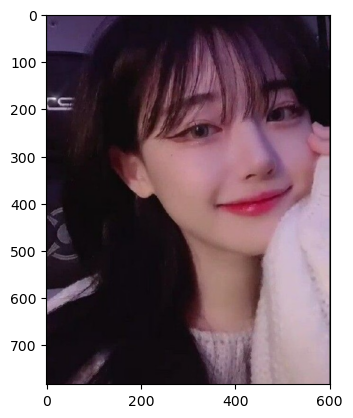

In [9]:
cvNP = cvTensor1.numpy()
print(f'cvNP : {cvNP.shape}, {cvNP.ndim}')

plt.imshow(cvNP)
plt.show()

In [10]:
from torchvision.transforms import v2

v2.ToImage()(cv_img) # 얘를 해보면 pillow 이미지 객체를 줌.

Image([[[ 24,  33,  27,  ...,  35,  34,  34],
        [ 28,  27,  28,  ...,  31,  30,  32],
        [ 38,  24,  41,  ...,  32,  38,  34],
        ...,
        [  1,   1,  18,  ..., 188, 184,   7],
        [  1,   1,  18,  ..., 188, 184,   7],
        [  1,   1,  18,  ..., 188, 184,   7]],

       [[ 34,  43,  30,  ...,  33,  33,  33],
        [ 35,  33,  31,  ...,  29,  29,  31],
        [ 43,  28,  39,  ...,  30,  37,  33],
        ...,
        [  0,   0,  14,  ..., 166, 168,   0],
        [  0,   0,  14,  ..., 166, 168,   0],
        [  0,   0,  14,  ..., 166, 168,   0]],

       [[ 23,  35,  35,  ...,  44,  41,  38],
        [ 27,  29,  38,  ...,  40,  37,  36],
        [ 37,  27,  50,  ...,  41,  45,  38],
        ...,
        [  0,   0,  15,  ..., 179, 178,   2],
        [  0,   0,  15,  ..., 179, 178,   2],
        [  0,   0,  15,  ..., 179, 178,   2]]], dtype=torch.uint8, )

* Torch ==> PIL Image <hr>

In [11]:
pilIMG1 = transforms.ToPILImage()(pilTensor2)
print(f'pilIMG1 : {pilIMG1.width}, {pilIMG1.height}, {pilIMG1.mode}')
pilIMG1.show()

pilIMG1 : 601, 783, RGB
